> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate No-show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Data Set**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>
> * ‘ScheduledDay’ tells us on what day the patient set up their appointment. 
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* ‘No-show’ **(Be careful !!)** says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
>
> #reference: https://www.kaggle.com/joniarroba/noshowappointments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 10

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# To create a nwe No-show column which maps the 'No' and 'Yes' of No-Show to binary values
# 1 : No-show=Yes 
# 0 : No-show=No
df['No_show']=df['No-show']
df['No_show'].replace({'No':0,'Yes':1},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [5]:
#This dataset is created by people from a non-english speaking country, and there are few typos in column names
#I would correct the misspelling of column names first 
df.rename(columns = {'Hipertension': 'Hypertension',
                     'Handcap': 'Handicap'}, inplace = True)

print(df.columns)
#reference:
#https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'No_show'],
      dtype='object')


In [6]:
# check the df's shape
df.shape

(110527, 15)

In [7]:
# check if there is any null value
df.isnull().sum().sort_values(ascending=False)

No_show           0
No-show           0
SMS_received      0
Handicap          0
Alcoholism        0
                 ..
AppointmentDay    0
ScheduledDay      0
Gender            0
AppointmentID     0
PatientId         0
Length: 15, dtype: int64

In [8]:
#check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
No_show           110527 non-null int64
dtypes: float64(1), int64(9), object(5)
memory usage: 12.6+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Age, WaitDays)

In [9]:
# check age column's unique values
a=df['Age'].unique()
print(sorted(a))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [10]:
# Age shall not have negative values, so drop ages equal to -1
df = df.drop(df.index[df.Age == -1])
df.shape

(110526, 15)

In [11]:
# Check outliers in age column
df.query('Age>100').count()

PatientId         7
AppointmentID     7
Gender            7
ScheduledDay      7
AppointmentDay    7
                 ..
Alcoholism        7
Handicap          7
SMS_received      7
No-show           7
No_show           7
Length: 15, dtype: int64

In [12]:
# as we can see in the previous step, only 7 records have age>100 among 110526 records, we consider those are outliers
# and drop records with age >100
df = df.drop(df.index[df.Age > 100])
df.shape

(110519, 15)

In [13]:
# check the unique value of age again
a=df['Age'].unique()
print(sorted(a))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [14]:
#create age bins to facilitate age related analysis
bins = np.linspace(0,100,21)
bins = [int(i) for i in bins]
print(bins)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [15]:
df['ageBin'] = pd.cut(df['Age'],bins)
df.head()
#pd.cut(data['age'], 8).value_counts()
#df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_show,ageBin
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,"(60, 65]"
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,"(55, 60]"
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,"(60, 65]"
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,"(5, 10]"
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,"(55, 60]"


In [16]:
# Change the data type for scheduledDay and AppointmentDay, currently they are both in string type, 
# I would like to change them into DateTime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_show,ageBin
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,"(60, 65]"
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,"(55, 60]"
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,"(60, 65]"
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,"(5, 10]"
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,"(55, 60]"


In [17]:
# Create a day of week column for later analysis
df['Weekday'] = pd.to_datetime(df['AppointmentDay']).dt.weekday_name

In [18]:
df['WaitDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No_show,ageBin,Weekday,WaitDays
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,"(60, 65]",Friday,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,"(55, 60]",Friday,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,"(60, 65]",Friday,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,"(5, 10]",Friday,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,"(55, 60]",Friday,0


In [19]:
a=df['WaitDays'].unique()
print(sorted(a))

[-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


In [20]:
# AppointmentDay shall not be eailer than ScheduleDay
# Drop WaitDays with negative values
df=df.drop(df.index[df.WaitDays < 0])
df.shape


(110514, 18)

In [21]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitDays
count,1.105140e+05,1.105140e+05,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000,110514.000000
mean,1.474832e+14,5.675303e+06,37.084686,0.098277,0.197260,0.071873,0.030403,0.022196,0.321054,0.201884,10.184438
std,2.560742e+14,7.129747e+04,23.103024,0.297690,0.397932,0.258279,0.171695,0.161391,0.466884,0.401408,15.255288
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640283e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173016e+13,5.680570e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


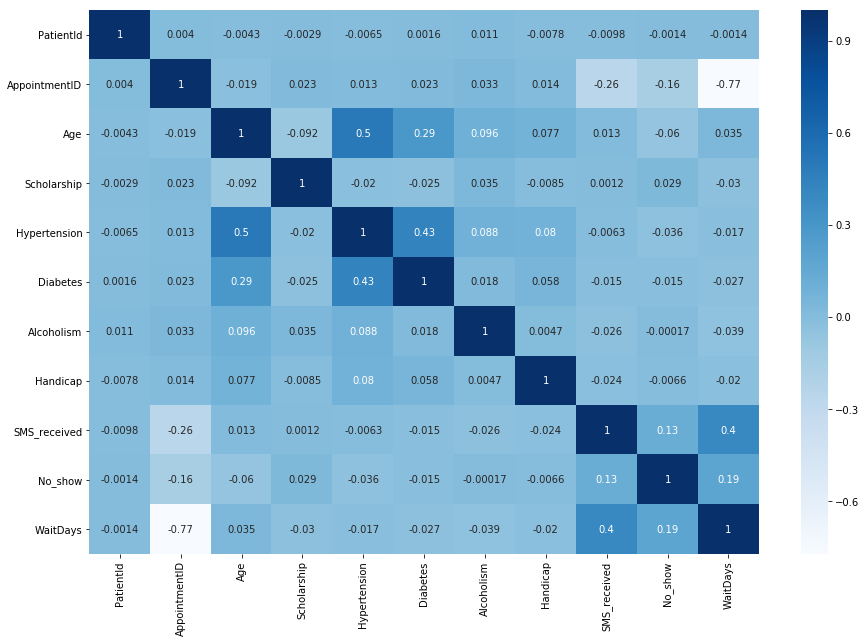

In [22]:
# I am interested in the correlation between attributes of the data, 
# so I create a heatmap to see the correlation values
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True, cmap="Blues");

Based on the heatmap, we can see there is some correlation between age and hypertension. Also, there is a weak correlation between hypertension and diabetes. 

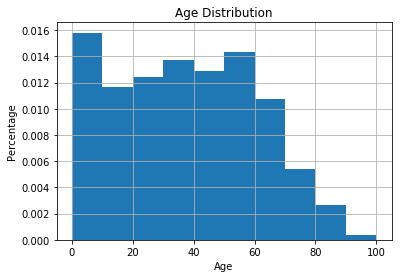

In [23]:
# Explore the age distribution
df.hist('Age',density=1)
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.title('Age Distribution')
plt.show()

According to the histogram, there are lots of young children below 10 years old. Besides that, majority of patients are between 30 to 60 years old. And, as age gets older, the number of senior patients reduces.

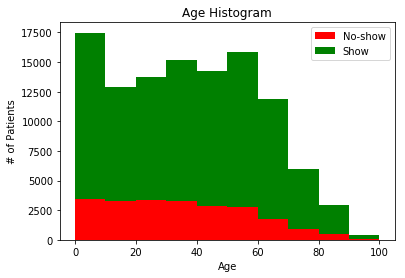

In [24]:
# Explore the age distribution vs. Show up rate
plt.hist(x = [df[(df['No-show']=='Yes')]['Age'], df[(df['No-show']=='No')]['Age']], stacked=True, color = ['r','g'],label = ['No-show','Show'])
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('# of Patients')
plt.legend()
plt.show()

As we can see, the number of 'no-shows' reduces as age increases. One of the possible reasons to explain why is senior people are more health-conscious.

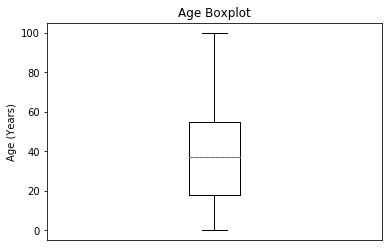

In [25]:
#check boxplot for age
plt.boxplot(df['Age'], showmeans = True, meanline = True)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')
plt.show()
# source: https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot

The boxplot is created to check the average, min, max of the age data. The mean age is around 38 years old, max is 100 and min is 0, the majority of patients have ages between 20 to 58. 

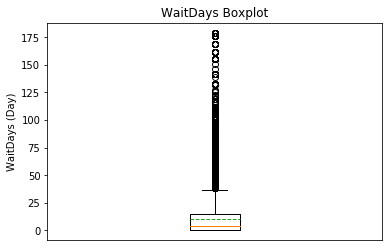

In [26]:
#check boxplot for WaitDays
plt.boxplot(df['WaitDays'], showmeans = True, meanline = True)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('WaitDays Boxplot')
plt.ylabel('WaitDays (Day)')
plt.show()
# source: https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot

The waitdays boxplot is used to see the distribution of wait days for all patients, from the plot we can see the min wait days is 0 and max wait day can be over 175 days. However, most of patients have a wait day within 20 days.

In [27]:
# check mean values for No-show and Show groups 
df.groupby('No_show').mean()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitDays
No_show,,,,,,,,,,
0,1.476677e+14,5.681134e+06,37.787297,0.093908,0.204392,0.073841,0.030418,0.022732,0.291339,8.754963
1,1.467539e+14,5.652252e+06,34.307023,0.115548,0.169065,0.064094,0.030344,0.020080,0.438528,15.835642


Create distribution plots, for x-ticks, 1 means 'yes', 0 means 'no' 

In [28]:
def count_plot(columnName):
    ax=df.groupby(columnName)[columnName].count().plot(kind='bar',color='xkcd:silver',figsize=(14,6))
    plt.title(columnName,fontsize=12)
    plt.xlabel(columnName,fontsize=12)
    plt.ylabel('number of patients',fontsize=12)
    #ax.set_ylim(0,0.4)
    #plt.show()
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                     textcoords='offset points')

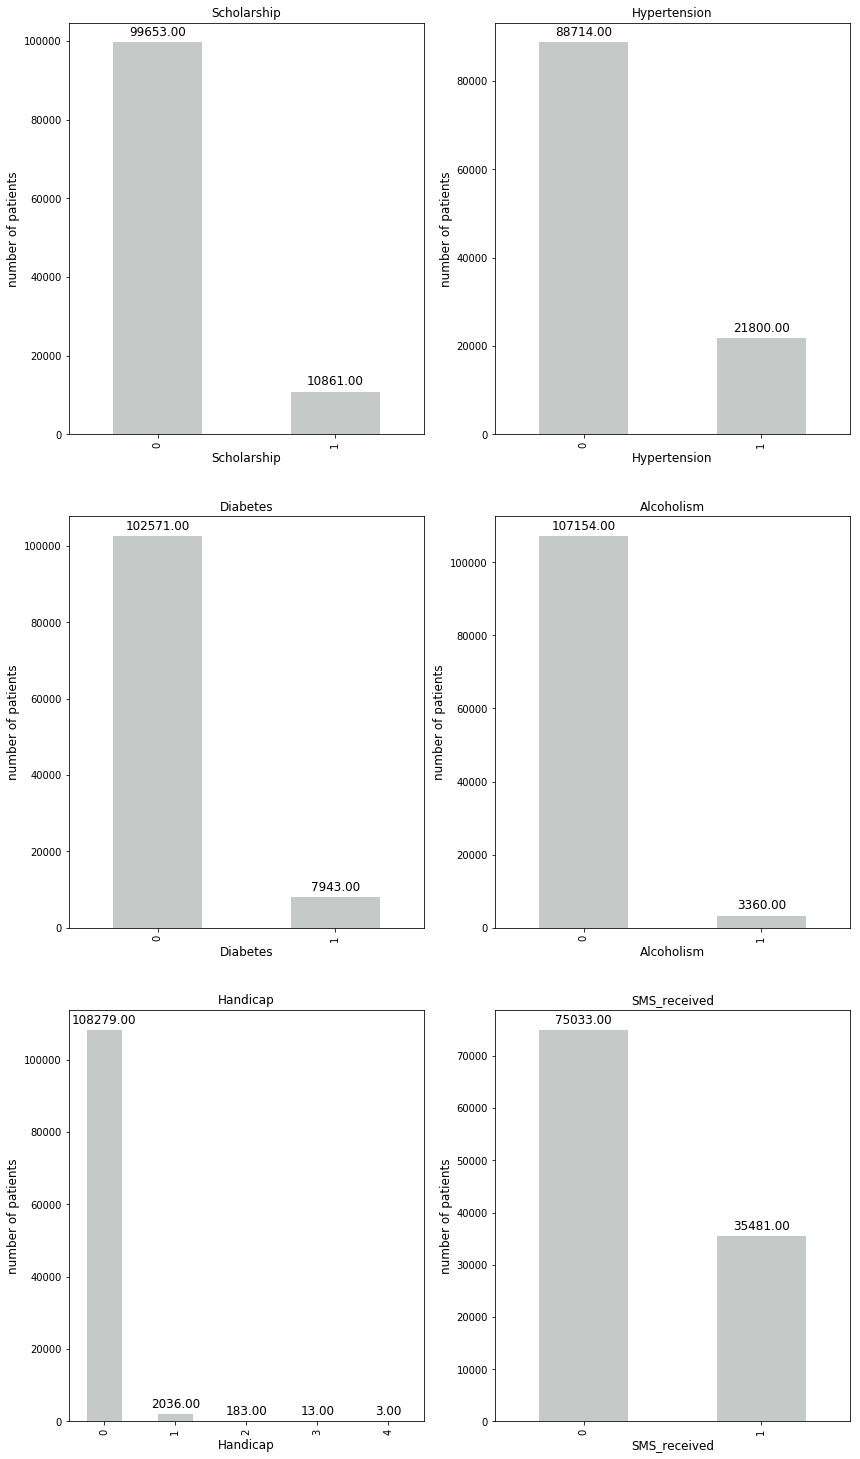

In [29]:
spn = [421, 422, 423, 424, 425, 426]
n=0
plt.subplots_adjust(bottom=-3.5)
plt.tight_layout()
for i in ['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']:
    plt.subplot(spn[n])
    n+=1
    count_plot(i)

The reason to create this distribution plots is to show the patients count with diffrent attributes. We can see the following:
1. Most of people don't received scholarship.
2. Most of people don't have hypertension.
3. Most of people don't have diabetes.
4. Most of people don't have alcoholism.
5. Most of people are not handicaped.
6. 1/3 of people receive sms.

### Research Question 1 (Which feature is more related to No-Show?)

Create plots regarding No-Show Percentage, 1 means 'yes', 0 means 'no' 

In [30]:
def pct_plot(columnName):
    ax=df.groupby(columnName)['No_show'].mean().plot(kind='bar',color='xkcd:silver',figsize=(14,6))
    plt.title(columnName,fontsize=12)
    plt.xlabel(columnName,fontsize=12)
    plt.ylabel('No-Show percentage',fontsize=12)
    ax.set_ylim(0,0.4)
    #plt.show()
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                     textcoords='offset points')

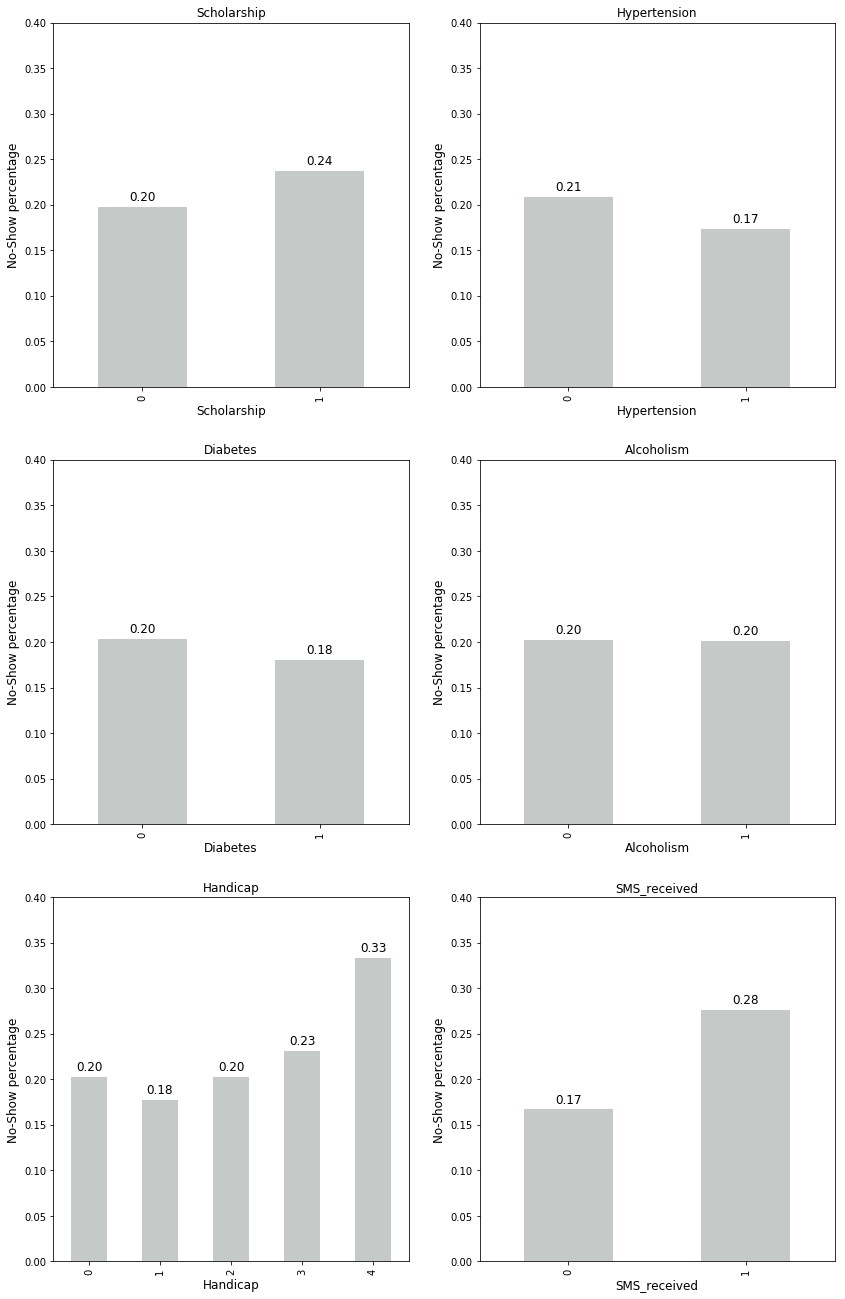

In [31]:
spn = [421, 422, 423, 424, 425, 426]
n=0
plt.subplots_adjust(bottom=-3)
plt.tight_layout()
for i in ['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']:
    plt.subplot(spn[n])
    n+=1
    pct_plot(i)

Based on the subplots, we can see that people received SMS messages have a much less likelyhood to show-up than people didn't receive SMS message. All other attributes are insignificant to affect No-Show up rate. (Handicap level seem to have some impact to the no-show rate, as we can see the no-show percentage raises as the level of handicap increase, but the sample size for level 3 and 4 is too small, so we can't make such conclusion)

### Research Question 2 (What's the influence of age on No-Show up rate?)

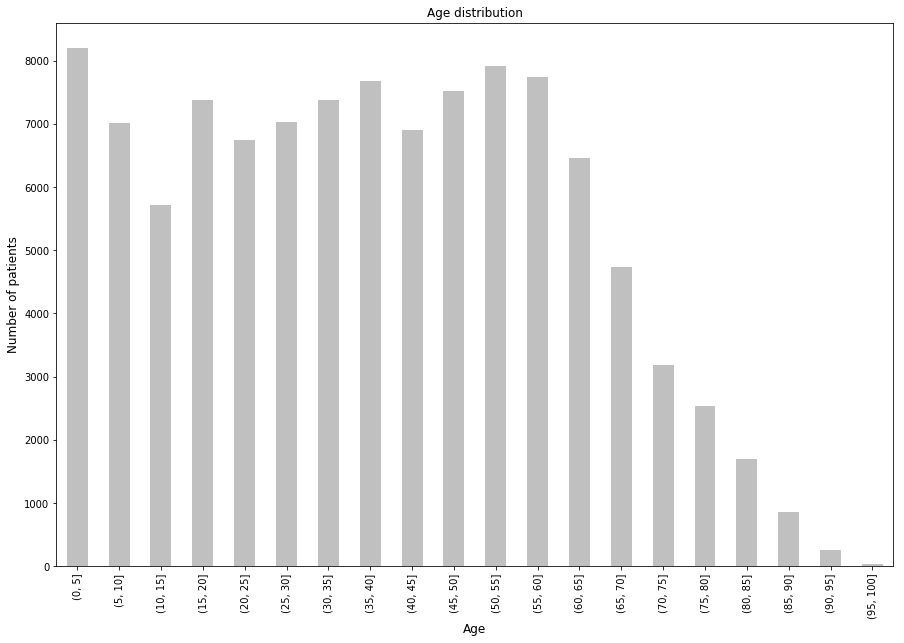

In [32]:
df_age = df[['No_show', 'ageBin']].groupby('ageBin').count()
plt.title('Age distribution',fontsize=12)
df_age['No_show'].plot(kind='bar',color='silver',figsize=(15,10))
plt.ylabel('Number of patients',fontsize=12)
plt.xlabel('Age',fontsize=12)
plt.show()
#age bin above 95 is negligible

Based on the age distribution plot, we can see the number of patients in each age bin. There are many new born babies from 0-5 years old. The majority of patients are 15 to 65 years old. And the number of senior patients over 65 years old redeuces quickly as age increases.

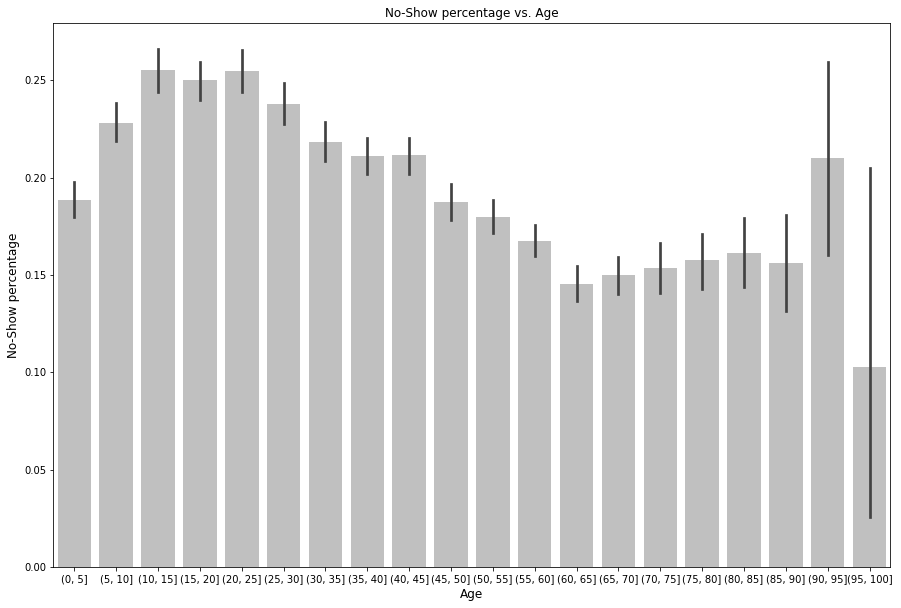

In [33]:
# check which age groups are more likely to No-Show 
plt.subplots(figsize=(15,10))
sns.barplot(x = 'ageBin', y = 'No_show', data=df, color='silver')
plt.title('No-Show percentage vs. Age',fontsize=12)
plt.ylabel('No-Show percentage',fontsize=12)
plt.xlabel('Age',fontsize=12)
plt.show()

Based on the no-show percentage vs. age graph, we can see that teenage and young adults have much higher No-Show rate
than senior people, and as people aging, the likelyhood of missing appointment is lower.


### Research Question 3  (Which neighbourhood has the worst show-up rate?)

In [34]:
# investigate Neighbourhood's show up rate
df_NB_count=df.groupby('Neighbourhood')['No_show'].count().reset_index().sort_values('No_show', ascending=False)
df_NB_count['No_show'].describe()

count      81.000000
mean     1364.370370
std      1369.048223
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: No_show, dtype: float64

In [35]:
df_NB_count.rename(columns={'No_show':'No_show_counts'},inplace=True)
df_NB_count.head()

,Neighbourhood,No_show_counts
38,JARDIM CAMBURI,7717
43,MARIA ORTIZ,5804
59,RESISTÊNCIA,4430
39,JARDIM DA PENHA,3877
36,ITARARÉ,3514


In [36]:
df_NB_mean = df.groupby('Neighbourhood')['No_show'].mean().reset_index().sort_values('No_show', ascending=False)
df_NB_mean.head()

,Neighbourhood,No_show
34,ILHAS OCEÂNICAS DE TRINDADE,1.000000
70,SANTOS DUMONT,0.289185
61,SANTA CECÍLIA,0.274554
62,SANTA CLARA,0.264822
36,ITARARÉ,0.262664


In [37]:
df_NB_combine=df_NB_mean.merge(df_NB_count,how='inner',on='Neighbourhood')
df_NB_combine.head()

,Neighbourhood,No_show,No_show_counts
0,ILHAS OCEÂNICAS DE TRINDADE,1.000000,2
1,SANTOS DUMONT,0.289185,1276
2,SANTA CECÍLIA,0.274554,448
3,SANTA CLARA,0.264822,506
4,ITARARÉ,0.262664,3514


In [38]:
# set a threshold, we don't want to include the neighbourhood with too few samples
th = 35

In [39]:
#remove rows with too few samples
df_NB = df_NB_combine[df_NB_combine['No_show_counts']>th]
df_NB=df_NB.sort_values(by='No_show',ascending=False)
#df_NB.set_index(['Neighbourhood'])

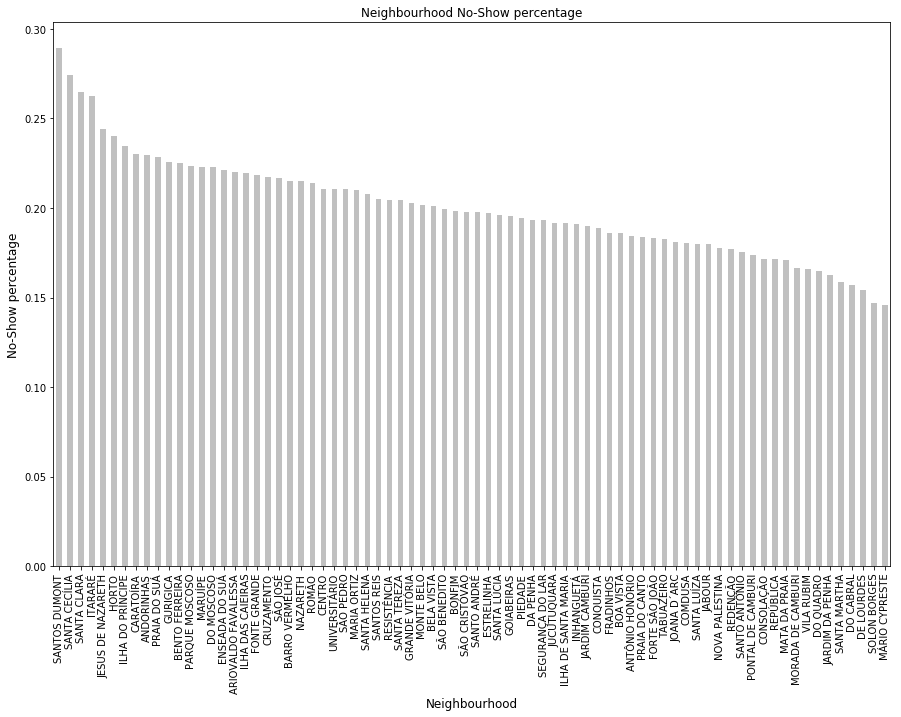

In [40]:
plt.title('Neighbourhood No-Show percentage',fontsize=12)
ax=df_NB['No_show'].plot(kind='bar',color='silver',figsize=(15,10))
plt.ylabel('No-Show percentage',fontsize=12)
plt.xlabel('Neighbourhood',fontsize=12)
ax.set_xticklabels(df_NB['Neighbourhood'], rotation=90)
plt.show()

As we can see in the neighbourhood vs. No-show percentage plot, Santos Dumont has the highest no-show rate, if we have additional info for neighbourhood, we can have deeper examination on why some neighbourhoods have higher no-show rate.

### Research Question 4 (Does waiting time relate to the show-up rate?)

In [41]:
df.groupby('No_show')['WaitDays'].mean()

No_show
0     8.754963
1    15.835642
Name: WaitDays, dtype: float64

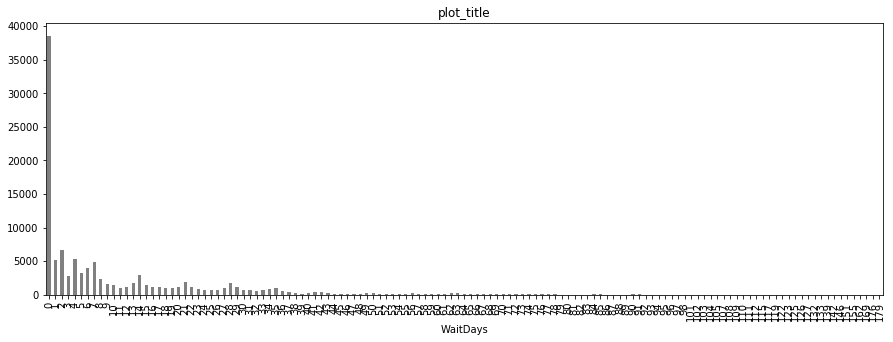

In [42]:
df_wt_c = df[['No_show', 'WaitDays']].groupby('WaitDays').count()
ax = df_wt_c['No_show'].plot(kind='bar', figsize=(15, 5), title='plot_title',color = 'grey')

Not many counts for wait-time longer than 5 weeks, so I decide to only take 5 weeks of time for analysis

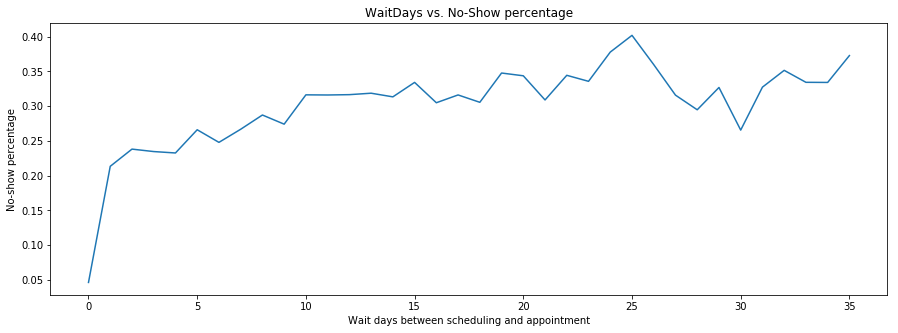

In [43]:
df_wt = df[['No_show', 'WaitDays']].groupby('WaitDays').mean().reset_index()
df_wt=df_wt[df_wt['WaitDays'] <= 35]
ax = df_wt['No_show'].plot(kind='line', figsize=(15, 5), title='WaitDays vs. No-Show percentage')
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Wait days between scheduling and appointment')
plt.show()

As we can see the longer the waiting time, the higher the no-show percentage. Therefore, waiting time and no-show shall be positively correlated.

### Research Question 5 (Which day of the week has the highest no-show rate?)

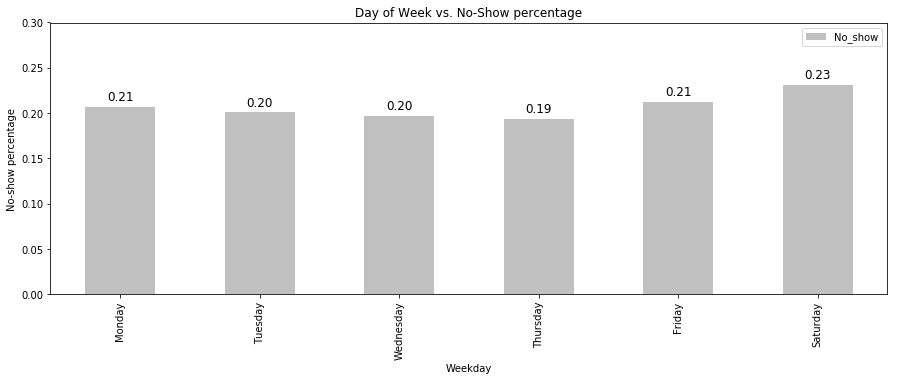

In [44]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_dofw=df.groupby('Weekday')['No_show'].mean().reset_index()
df_dofw['Weekday'] = pd.Categorical(df_dofw['Weekday'], categories=cats, ordered=True)
df_dofw = df_dofw.sort_values('Weekday')
df_dofw=df_dofw.set_index('Weekday')
ax=df_dofw.plot(kind='bar', figsize=(15, 5), title='Day of Week vs. No-Show percentage', color='silver')
ax.set_ylabel('No-show percentage')
ax.set_ylim(0,0.3)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                     textcoords='offset points')
plt.show()

#reference for reordering index: https://stackoverflow.com/questions/53189216/sorting-pandas-dataframe-by-weekdays


As we can see, Saturday has the highest no-show rate.

<a id='conclusions'></a>
## Conclusions

In this workbook, we have explored No-Show appointments dataset, and answer 4 key questions using data analysis techniques. The main findings are listed below:
    1. Patients received SMS messages are less likely to show-up than people didn't receive SMS message.
    2. Teenage and young adults have higher No-Show rate than senior people, and as people start aging, the no-show rate decreases.
    3. The No-show rate varies from different neighbourhoods, Santos Dumont has the highest no-show rate.
    4. Waiting time has a positive correlation with no-show, and the longer the waiting time the higher the no-show rate.
    5. Saturday has the highest no-show rate.
  
  
Limitations:

There are outliers in the data that are caused by either errors of data input or small sample size. In order to improve the analyze, these outliers have been removed and they are discussed in previous sections.

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!